# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$
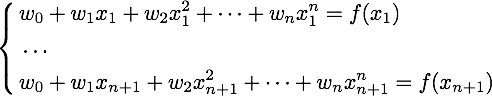
Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.
Как известно, многочлен степени n (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... w_n$ можно определить из следующей системы линейных уравнений:
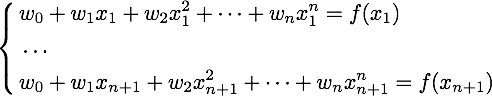
где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1}) $— значения, которые он должен принимать в этих точках.
Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.


1.	Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. 

In [4]:
import numpy as np
import scipy 
import matplotlib as plt

In [5]:
import math
def func(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5.0 * math.exp(-x / 2.0)

In [6]:
def calc_y(x):
    y=[]
    for k in x:
        c=func(k)
        y.append(c)
    return y

In [7]:
x=[1.0, 15.0]
y=calc_y(x)
a=np.array([[1.0,1.0], [1.0,15.0]])

In [8]:
from scipy import linalg

In [9]:
res = linalg.solve(a, y)
w=np.array(res)

In [10]:
def weigth_func1(x):
    return w[0]+w[1]*x

def calc_weigth_y(x):
    y=[]
    for k in x:
        c=weigth_func1(k)
        y.append(c)
    return y

In [14]:
inp=np.arange(1,16)
weight_1=calc_weigth_y(inp)

In [18]:
from matplotlib import pylab as plt

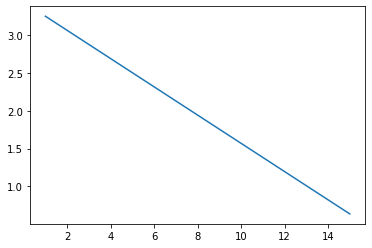

In [17]:
plt.plot(inp,weight_1)
plt.show()

2.	Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. 

In [28]:
x2=[ 1.0, 8.0, 15.0]
y2=calc_y(x2)
a2=np.array([[1.0, 1.0, 1.0], [1.0, 8.0, 64.0], [1.0, 15.0, 225.0]])

In [29]:
res2 = linalg.solve(a2, y2)
w2=np.array(res2)

In [30]:
def weigth_func2(x):
    return w2[0]+w2[1]*x+w2[2]*(x**2)

def calc_weigth_y2(x):
    y=[]
    for k in x:
        c=weigth_func2(k)
        y.append(c)
    return y

weight_2=calc_weigth_y2(inp)

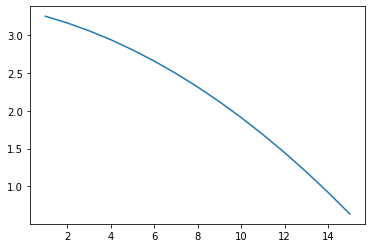

In [31]:
plt.plot(inp,weight_2)
plt.show()

In [33]:
x3=[ 1.0, 4.0, 10.0, 15.0]
y3=calc_y(x3)
a3=np.array([[1.0, 1.0, 1.0, 1.0], [1.0, 4.0, 4.0**2, 4.0**3],[1.0, 10.0, 10.0**2, 10.0**3], [1.0, 15.0, 15.0**2, 15.0**3]])
res3 = linalg.solve(a3, y3)
w3=np.array(res3)

In [34]:
def weigth_func3(x):
    return w3[0]+w3[1]*x+w3[2]*(x**2)+w3[3]*(x**3)

def calc_weigth_y3(x):
    y=[]
    for k in x:
        c=weigth_func3(k)
        y.append(c)
    return y

weight_3=calc_weigth_y3(inp)

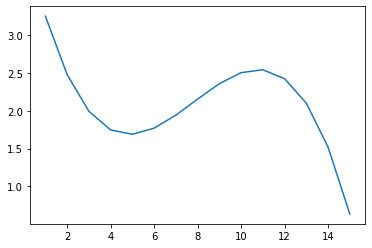

In [35]:
plt.plot(inp,weight_3)
plt.show()

3.	Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. 

In [51]:
from matplotlib import pylab as plt

In [37]:
out=calc_y(inp)

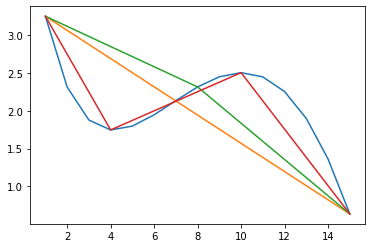

In [38]:
plt.plot(inp,out, x, np.dot(a,w), x2, np.dot(a2,w2),x3, np.dot(a3,w3))
plt.show()

In [39]:
np.round(w3,2)

array([ 4.36, -1.3 ,  0.19, -0.01])

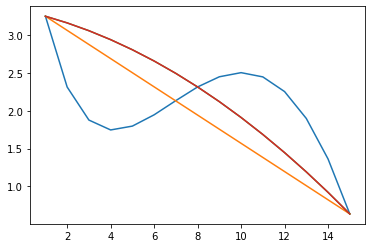

In [40]:
plt.plot(inp,out, inp, weight_1, inp, weight_2,inp, weight_2)
plt.show()

In [45]:
np.round(w3,2)

array([ 4.36, -1.3 ,  0.19, -0.01])